### Investigating Tweet Volume and its Influence on the Company Stock Price

In this project, we will be investigating the influence tweets have on the stock market. We have decided to explore the number of tweets about Amazon, and its effects on the stock price of Amazon. 

Our initial question was to explore what variables may impact the price of a stock. After finding a dataset about the effects of tweet sentiment, we decided to use this to investigate tweet volume. Therefore our project analyses the volume of tweets about Amazon, and the price of Amazon stock between 2015 and 2020. 

This notebook outlines our analysis of this question. 

In [33]:
# Importing the libraries required for our analysis. 

import numpy as np 
import pandas as pd 

import datetime as dt
from datetime import datetime 

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight') 

The dataset we used was from a data science project investigating the effect of tweet sentiment on the stock market. The Amazon stock market data from NASDAQ was also downloaded from this project.

This can be found here: 

https://www.kaggle.com/code/renjithrrkj/influence-of-tweets-on-stock-martket/data

https://www.kaggle.com/datasets/omermetinn/tweets-about-the-top-companies-from-2015-to-2020?resource=download

In [34]:
# Reading in the tweet data and Amazon stock price data.

tweet_data = pd.read_csv('Tweet.csv')  
company_tweets_data = pd.read_csv('Company_Tweet.csv') 
amazon_price_data = pd.read_csv('AMZN.csv')
amazon_price_data



,Date,Low,Open,Volume,High,Close,Adjusted Close
0,15-05-1997,1.927083,2.437500,72156000,2.500000,1.958333,1.958333
1,16-05-1997,1.708333,1.968750,14700000,1.979167,1.729167,1.729167
2,19-05-1997,1.625000,1.760417,6106800,1.770833,1.708333,1.708333
3,20-05-1997,1.635417,1.729167,5467200,1.750000,1.635417,1.635417
4,21-05-1997,1.375000,1.635417,18853200,1.645833,1.427083,1.427083
...,...,...,...,...,...,...,...
6015,12-04-2021,3351.149902,3355.209961,3281800,3395.040039,3379.389893,3379.389893
6016,13-04-2021,3395.629883,3400.850098,3315800,3432.000000,3400.000000,3400.000000
6017,14-04-2021,3326.000000,3404.040039,3145200,3404.129883,3333.000000,3333.000000
6018,15-04-2021,3352.000000,3371.000000,3233600,3397.000000,3379.090088,3379.090088


In [35]:
# Merging the datasets 'Tweet Data' and 'Company Tweets' as the tweets are only identified by tweet ID.
# Therfore this aligns each tweet to the Amazon ticker.

merged_tweet_dataset = pd.merge(tweet_data, company_tweets_data, on="tweet_id", how='inner')


# Formatting the 'post date' column in the 'merged tweet dataset' to show the correct dates in a new column 
# called 'Date'.

merged_tweet_dataset['Date'] = pd.to_datetime(merged_tweet_dataset['post_date'], unit = 's').dt.strftime('%d-%m-%Y') 


# Merging the tweet data with the Amazon stock price data on the related 'Date' column. 

complete_data = pd.merge(amazon_price_data, merged_tweet_dataset, on='Date', how='inner')



In [36]:
# Checking the merged data is correct.

complete_data.head(5) 

,Date,Low,Open,Volume,High,Close,Adjusted Close,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol
0,02-01-2015,306.959991,312.579987,2783200,314.75,308.519989,308.519989,550804137118801921,DozenStocks,1420156914,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,1,AMZN
1,02-01-2015,306.959991,312.579987,2783200,314.75,308.519989,308.519989,550804503650242560,arianerandolph,1420157001,Will Audi's Electric Q7 Cause $TSLA Model X Ba...,0,0,0,TSLA
2,02-01-2015,306.959991,312.579987,2783200,314.75,308.519989,308.519989,550804846581125121,TMFJMo,1420157083,Either way you're a winnah. RT @dbbrakebill: i...,0,0,1,AAPL
3,02-01-2015,306.959991,312.579987,2783200,314.75,308.519989,308.519989,550804975631089664,Weeklyoptions,1420157114,@Weeklyoptions http://Weeklyoptionplays.com we...,0,0,1,AAPL
4,02-01-2015,306.959991,312.579987,2783200,314.75,308.519989,308.519989,550805682044559361,TMFJMo,1420157282,"Cash flow machine. RT @themandotcom: $MSFT, wh...",0,0,0,MSFT


In [37]:
# Formatting the date series column from a string to a timestamp.
# New date format = Year / Month / Day 

complete_data['Date'] = pd.to_datetime(complete_data['Date'], format= '%d-%m-%Y') 


# Checking the format of the date.
# This format will allow us to use Boolean operators to filter specific dates.

complete_data.head(5) 

,Date,Low,Open,Volume,High,Close,Adjusted Close,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol
0,2015-01-02,306.959991,312.579987,2783200,314.75,308.519989,308.519989,550804137118801921,DozenStocks,1420156914,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,1,AMZN
1,2015-01-02,306.959991,312.579987,2783200,314.75,308.519989,308.519989,550804503650242560,arianerandolph,1420157001,Will Audi's Electric Q7 Cause $TSLA Model X Ba...,0,0,0,TSLA
2,2015-01-02,306.959991,312.579987,2783200,314.75,308.519989,308.519989,550804846581125121,TMFJMo,1420157083,Either way you're a winnah. RT @dbbrakebill: i...,0,0,1,AAPL
3,2015-01-02,306.959991,312.579987,2783200,314.75,308.519989,308.519989,550804975631089664,Weeklyoptions,1420157114,@Weeklyoptions http://Weeklyoptionplays.com we...,0,0,1,AAPL
4,2015-01-02,306.959991,312.579987,2783200,314.75,308.519989,308.519989,550805682044559361,TMFJMo,1420157282,"Cash flow machine. RT @themandotcom: $MSFT, wh...",0,0,0,MSFT


In [38]:
# Converting string columns 'Open' and 'Close' to integers.

complete_data['Open'] = complete_data['Open'].astype(int)  
complete_data['Close'] = complete_data['Close'].astype(int)  


# Creating a new column to show the daily change in price (close - open in a day)

complete_data['Day_Price_Change'] = complete_data['Close'] - complete_data['Open'] 
complete_data

,Date,Low,Open,Volume,High,Close,Adjusted Close,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,Day_Price_Change
0,2015-01-02,306.959991,312,2783200,314.75000,308,308.519989,550804137118801921,DozenStocks,1420156914,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,1,AMZN,-4
1,2015-01-02,306.959991,312,2783200,314.75000,308,308.519989,550804503650242560,arianerandolph,1420157001,Will Audi's Electric Q7 Cause $TSLA Model X Ba...,0,0,0,TSLA,-4
2,2015-01-02,306.959991,312,2783200,314.75000,308,308.519989,550804846581125121,TMFJMo,1420157083,Either way you're a winnah. RT @dbbrakebill: i...,0,0,1,AAPL,-4
3,2015-01-02,306.959991,312,2783200,314.75000,308,308.519989,550804975631089664,Weeklyoptions,1420157114,@Weeklyoptions http://Weeklyoptionplays.com we...,0,0,1,AAPL,-4
4,2015-01-02,306.959991,312,2783200,314.75000,308,308.519989,550805682044559361,TMFJMo,1420157282,"Cash flow machine. RT @themandotcom: $MSFT, wh...",0,0,0,MSFT,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3705381,2019-12-31,1832.229980,1842,2506500,1853.26001,1847,1847.839966,1212159838882533376,ShortingIsFun,1577836401,In 2020 I may start Tweeting out positive news...,0,0,1,TSLA,5
3705382,2019-12-31,1832.229980,1842,2506500,1853.26001,1847,1847.839966,1212160015332728833,Commuternyc,1577836443,Patiently Waiting for the no twitter sitter tw...,0,0,5,TSLA,5
3705383,2019-12-31,1832.229980,1842,2506500,1853.26001,1847,1847.839966,1212160410692046849,MoriaCrypto,1577836537,I don't discriminate. I own both $aapl and $ms...,1,0,1,AAPL,5
3705384,2019-12-31,1832.229980,1842,2506500,1853.26001,1847,1847.839966,1212160410692046849,MoriaCrypto,1577836537,I don't discriminate. I own both $aapl and $ms...,1,0,1,MSFT,5


In [39]:
# Filtering the data using a Boolean operator to show only Amazon related data. 

amazon_data_bool = complete_data['ticker_symbol'] == 'AMZN'
amazon_data = complete_data[amazon_data_bool] 

# Checking the data to ensure it is in the correct format, and contains the columns we need for analysis.
amazon_data.head(10)


# This dataset now consists of Amazon related tweets, the Amazon stock price and the daily stock price change
# for each day. 

,Date,Low,Open,Volume,High,Close,Adjusted Close,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,Day_Price_Change
0,2015-01-02,306.959991,312,2783200,314.75,308,308.519989,550804137118801921,DozenStocks,1420156914,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,1,AMZN,-4
7,2015-01-02,306.959991,312,2783200,314.75,308,308.519989,550806376092807168,craigbuj,1420157448,perfectly trading the S&P 500 in 2014 $FB $MU ...,0,0,1,AMZN,-4
11,2015-01-02,306.959991,312,2783200,314.75,308,308.519989,550808188237279232,1Copenut,1420157880,"@KyleRohde @thehilker It could be, but that's ...",0,0,1,AMZN,-4
19,2015-01-02,306.959991,312,2783200,314.75,308,308.519989,550810934902390785,DaveHegedus,1420158535,RBC Capitals Top Internet Surprise Predictions...,0,0,1,AMZN,-4
29,2015-01-02,306.959991,312,2783200,314.75,308,308.519989,550821049059655681,heronjohnson2,1420160946,"FedEx, UPS Recalculate, Raise Rates http://ao...",0,0,1,AMZN,-4
31,2015-01-02,306.959991,312,2783200,314.75,308,308.519989,550824655377158144,LukasFittl,1420161806,"""Safety used to mean gold, US treasuries, and ...",0,0,2,AMZN,-4
49,2015-01-02,306.959991,312,2783200,314.75,308,308.519989,550833797651267584,SentiQuant,1420163986,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1,AMZN,-4
52,2015-01-02,306.959991,312,2783200,314.75,308,308.519989,550835420234133504,Maximum_Pain_cm,1420164372,$AMZN Max Pain = 307.50. Maturity = 01/02/2015...,0,0,0,AMZN,-4
57,2015-01-02,306.959991,312,2783200,314.75,308,308.519989,550838309170057217,Maximum_Pain_cm,1420165061,$AMZN high open interest range is 275.00 to 32...,0,0,1,AMZN,-4
66,2015-01-02,306.959991,312,2783200,314.75,308,308.519989,550845278941884416,Russe9,1420166723,"$amzn short thesis back on the menu, looks gre...",0,0,1,AMZN,-4


The dataset is now formatted ready to begin the analysis. It consists of only data related to tweets about Amazon, including the stock price, date and the daily stock price change.  

To continue our analysis, we need to calculate the number of tweets made per month between 2015 and 2020. This can be done using a function, as shown below.

In [40]:
# This function calculates the number of tweets per month by counting the number of rows of filtered data
# between specific dates. The start of the month, and end of the month are the dates used. 

# date1 = 1st day of month , date2 = last day of month.

def n_monthly_tweets(date1, date2):
    month_array = amazon_data['Date'] >= date1
    dt_month = amazon_data[month_array] 
    month_2_array = dt_month['Date'] <= date2
    dt_month_2 = dt_month[month_2_array]  
    count_month = len(dt_month_2) 
    return(count_month) 

# By using the monthly tweet function, the number of tweets per month can be put into an array to create 
# an array containing the tweet count for a whole year.

def annual_tweet_count(year):

    n_tweets_year = np.array([

    n_monthly_tweets(str(year) +'-01-01', str(year) +'-01-31'), 
    n_monthly_tweets(str(year) +'-02-01', str(year) +'-02-28'), 
    n_monthly_tweets(str(year) +'-03-01', str(year) +'-03-31'), 
    n_monthly_tweets(str(year) +'-04-01', str(year) +'-04-30'),
    n_monthly_tweets(str(year) +'-05-01', str(year) +'-05-31'),
    n_monthly_tweets(str(year) +'-06-01', str(year) +'-06-30'),
    n_monthly_tweets(str(year) +'-07-01', str(year) +'-07-31'),
    n_monthly_tweets(str(year) +'-08-01', str(year) +'-08-31'),
    n_monthly_tweets(str(year) +'-09-01', str(year) +'-09-30'),
    n_monthly_tweets(str(year) +'-10-01', str(year) +'-10-31'),
    n_monthly_tweets(str(year) +'-11-01', str(year) +'-11-30'),
    n_monthly_tweets(str(year) +'-12-01', str(year) +'-12-31')

    ])
    return n_tweets_year;




In [41]:
# Tweet counts from 2015-2020

n_tweets_2015 = annual_tweet_count(2015)
n_tweets_2016 = annual_tweet_count(2016)
n_tweets_2017 = annual_tweet_count(2017)
n_tweets_2018 = annual_tweet_count(2018)
n_tweets_2019 = annual_tweet_count(2019)

In [42]:
# By using the concatenate function, the arrays containing the tweet count for each month per year, 
# can be joined together to create one array contaiing all of the tweet count data.

# The complete list of the number of tweets per month from 2015 to 2020. 

total_n_tweets = np.concatenate((n_tweets_2015, n_tweets_2016, n_tweets_2017, n_tweets_2018, n_tweets_2019)) 

# Checking the array. 
np.sort(total_n_tweets)

array([ 4502,  5252,  6413,  7019,  7413,  7560,  7634,  7677,  7728,
        8159,  8210,  8274,  8580,  8616,  8618,  8666,  9049,  9195,
        9547,  9714,  9721,  9771,  9900, 10135, 10200, 10223, 10303,
       10370, 10445, 10586, 10609, 10628, 10663, 10833, 10834, 10885,
       10888, 11002, 11014, 11071, 11122, 11143, 11171, 11282, 11334,
       11350, 11841, 12186, 12239, 12274, 12435, 12554, 12567, 12793,
       13021, 13079, 13413, 14512, 16349, 16563])

In [43]:
dt_month = amazon_data[(amazon_data['Date'] >= '2015-01-01') & (amazon_data['Date']<= '2015-01-31')]

dt_month

,Date,Low,Open,Volume,High,Close,Adjusted Close,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,Day_Price_Change
0,2015-01-02,306.959991,312,2783200,314.75,308,308.519989,550804137118801921,DozenStocks,1420156914,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,1,AMZN,-4
7,2015-01-02,306.959991,312,2783200,314.75,308,308.519989,550806376092807168,craigbuj,1420157448,perfectly trading the S&P 500 in 2014 $FB $MU ...,0,0,1,AMZN,-4
11,2015-01-02,306.959991,312,2783200,314.75,308,308.519989,550808188237279232,1Copenut,1420157880,"@KyleRohde @thehilker It could be, but that's ...",0,0,1,AMZN,-4
19,2015-01-02,306.959991,312,2783200,314.75,308,308.519989,550810934902390785,DaveHegedus,1420158535,RBC Capitals Top Internet Surprise Predictions...,0,0,1,AMZN,-4
29,2015-01-02,306.959991,312,2783200,314.75,308,308.519989,550821049059655681,heronjohnson2,1420160946,"FedEx, UPS Recalculate, Raise Rates http://ao...",0,0,1,AMZN,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62858,2015-01-30,340.739990,346,23856100,359.50,354,354.529999,561309918800535552,willyumhmm,1422661687,@petertrades whatcha think of $loco bud? Has a...,1,0,0,AMZN,8
62861,2015-01-30,340.739990,346,23856100,359.50,354,354.529999,561310729090138112,marketstocknews,1422661881,RT TheStreet: Amazon stunned analysts yesterda...,0,0,0,AMZN,8
62862,2015-01-30,340.739990,346,23856100,359.50,354,354.529999,561311428267634688,stockwire24,1422662047,"After-Hours Earnings News: Google Inc (GOOGL),...",0,0,0,AMZN,8
62864,2015-01-30,340.739990,346,23856100,359.50,354,354.529999,561311779167293440,dseetharaman,1422662131,How Preet Bharara Became The Southern District...,1,0,0,AMZN,8


In [50]:
# This function is similar to that of the tweet count function, where Boolean operators are used to find
# the average stock price change per month. 


def mean_month_price_change(date1, date2):
    dt_month = amazon_data[(amazon_data['Date'] >= date1) & (amazon_data['Date']<= date2)] 
    mean = sum(dt_month['Day_Price_Change']) / len(dt_month['Day_Price_Change']) 
    return(mean) 

# This function uses the mean monthly price change function to return the average price change per year using 
# the year as an argument.

def avg_annual_price_change(year):
    
    avg_price_change = np.array([
    mean_month_price_change(str(year) +'-01-01', str(year) +'-01-31'), 
    mean_month_price_change(str(year) +'-02-01', str(year) +'-02-28'), 
    mean_month_price_change(str(year) +'-03-01', str(year) +'-03-31'), 
    mean_month_price_change(str(year) +'-04-01', str(year) +'-04-30'),
    mean_month_price_change(str(year) +'-05-01', str(year) +'-05-31'),
    mean_month_price_change(str(year) +'-06-01', str(year) +'-06-30'),
    mean_month_price_change(str(year) +'-07-01', str(year) +'-07-31'),
    mean_month_price_change(str(year) +'-08-01', str(year) +'-08-31'),
    mean_month_price_change(str(year) +'-09-01', str(year) +'-09-30'),
    mean_month_price_change(str(year) +'-10-01', str(year) +'-10-31'),
    mean_month_price_change(str(year) +'-11-01', str(year) +'-11-30'),
    mean_month_price_change(str(year) +'-12-01', str(year) +'-12-31')
    ])
    return avg_price_change


In [51]:
# Creating variables for the average price change per year using the function.

avg_price_change_2015 = avg_annual_price_change(2015)
avg_price_change_2016 = avg_annual_price_change(2016)
avg_price_change_2017 = avg_annual_price_change(2017)
avg_price_change_2018 = avg_annual_price_change(2018)
avg_price_change_2019 = avg_annual_price_change(2019)


In [52]:
# Using the concatenate function, we are able to join the average price change arrays to create one array
# containing all of the average price change data for the Amazon stock price between 2015 and 2020.


total_month_price_change = np.concatenate((avg_price_change_2015, avg_price_change_2016, avg_price_change_2017, avg_price_change_2018, avg_price_change_2019)) 

# Checking the array.
total_month_price_change

array([ 2.48022007e+00,  3.57152377e+00, -7.04493526e-03,  9.54314721e-01,
       -1.51255263e-02,  3.06663720e-01, -9.18685201e+00, -7.91042763e-01,
       -6.77731871e-01,  4.33532384e-01,  8.08160780e-01, -1.15624279e-01,
        3.62198537e+00, -1.82845868e+00,  2.07555556e+00, -1.33684113e+00,
        2.70889868e+00,  5.33643829e-01, -6.15035409e-01,  9.07171037e-01,
        3.20791872e+00, -3.50860284e+00, -4.51667549e+00, -1.68387566e+00,
        4.36456302e+00,  2.47272226e+00,  1.80282762e+00, -2.49316965e+00,
        2.06254501e+00, -6.47859687e+00, -7.82300753e-01, -2.62824086e+00,
       -2.65308619e+00,  6.82660430e+00,  1.98582937e-01, -2.11462811e+00,
        8.49816489e+00, -1.08700178e+01, -3.80377965e-02, -9.24648567e+00,
        4.18984751e+00,  1.78676471e+00, -2.89571068e+00,  1.07546127e+01,
       -1.85898765e+00, -1.96913573e+01,  7.17869147e+00, -9.97529339e+00,
        8.21333442e+00,  6.73068294e-03,  1.62220955e+00,  4.19609782e+00,
        9.33794860e-01, -

We now have two arrays of values to compare: number of tweets per month and the average price change per month. 

(array([ 2.,  1.,  6.,  9., 11., 17.,  8.,  3.,  1.,  2.]),
 array([ 4502. ,  5708.1,  6914.2,  8120.3,  9326.4, 10532.5, 11738.6,
        12944.7, 14150.8, 15356.9, 16563. ]),
 <BarContainer object of 10 artists>)

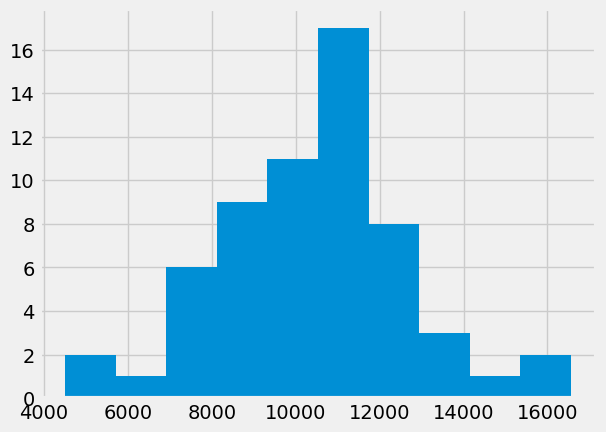

In [53]:
# A histogram of the number of tweets array (per month). 

plt.hist(total_n_tweets) 

(array([ 1.,  0.,  1.,  3.,  3., 10., 26., 10.,  4.,  2.]),
 array([-19.69135727, -16.55206601, -13.41277475, -10.27348349,
         -7.13419224,  -3.99490098,  -0.85560972,   2.28368154,
          5.4229728 ,   8.56226406,  11.70155532]),
 <BarContainer object of 10 artists>)

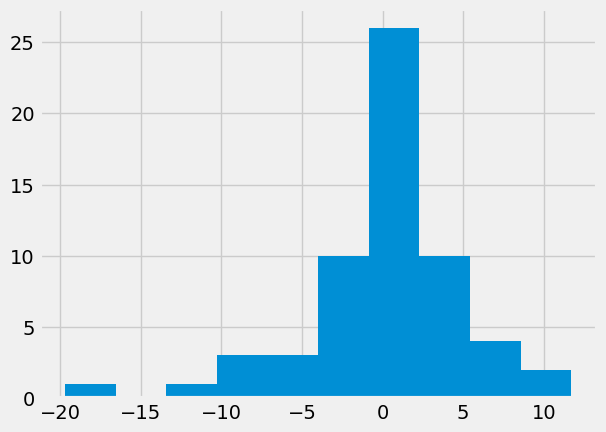

In [54]:
# A histogram of the average price change per month array. 

plt.hist(total_month_price_change)

Text(0, 0.5, 'Number of Tweets')

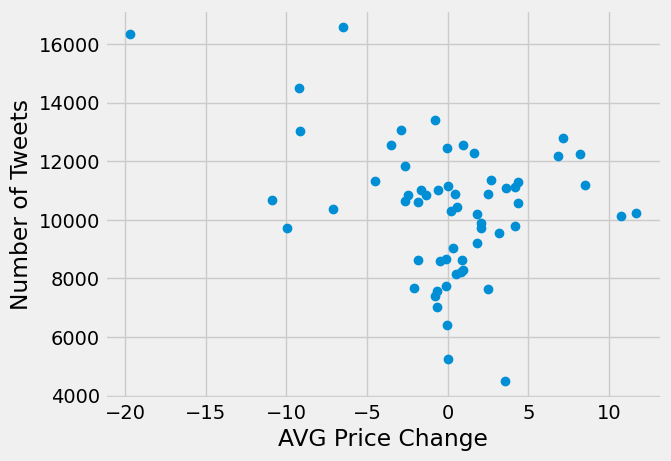

In [55]:
# Creating a scatterplot for the average price change, and the number of tweets.

plt.plot(total_month_price_change, total_n_tweets, 'o') 
plt.xlabel('AVG Price Change') 
plt.ylabel('Number of Tweets') 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8ed2cdbc-b239-479c-8e21-a9a8877b6149' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>